In [1]:
import os 
import operator
from collections import Counter

import swifter
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

np.random.seed = 0

import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.expand_frame_repr', False)

In [2]:
in_f = '../data/eval2_unlabelled.tsv'
df = pd.read_csv(in_f, sep='\t', header=None, index_col=False)

In [3]:
a = "Spread the coals out and place the grate on the grill. Gently place your salmon burgers in the middle. Cover the grill. For rare burgers, cook for four minutes on each side. To achieve a medium burger, cook for five minutes on each side. For well done burgers, six to seven minutes on each side."

In [4]:
len(a.split())

55

In [5]:
# df.loc[df[0]==110017]

In [6]:
# df['q_len'] = df.iloc[:,1].progress_apply(lambda x: len(x.split()))
# df['a_len'] = df.iloc[:,2].progress_apply(lambda x: len(x.split()))
# df.head()

In [7]:
df['q_len'] = df.iloc[:,1].swifter.apply(lambda x: len(x.split()))
df['a_len'] = df.iloc[:,2].swifter.apply(lambda x: len(x.split()))
# df.head()

Pandas Apply: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 415380/415380 [00:02<00:00, 180903.61it/s]


In [16]:
df['t_len'] = df.q_len + df.a_len
df.head()

,0,1,2,3,q_len,a_len,t_len
0,1136966,#ffffff color code,"Color hex is a easy to use tool to get the color codes information including color models (RGB,HSL,HSV and CMYK), css and html color codes.",0,3,25,28
1,1136966,#ffffff color code,"#ffffff Color Conversion. The hexadecimal color #ffffff has RGB values of R:255, G:255, B:255 and CMYK values of C:0, M:0, Y:0, K:0. Its decimal value is 16777215.",1,3,27,30
2,1136966,#ffffff color code,"CSS Codes; Color Preview; Color Schemes; Color Picker; #ffffff is being represented by the (255,255,255) RGB color. It means that the #ffffff hex color has a Red value of 255, a Green value of 255 and a Blue value of 255. In adition, #ffffff hex color can also be represented as HSL color. The HSL color that represent the #ffffff has a Heu: 0.00, saturation: 0.00 and a lightness value of ffffff is 1.00. The #ffffff hex color has one more representation that worth mention - the 4 color CMYK, also known as the process color.",2,3,96,99
3,1136966,#ffffff color code,"Color Hex Color Codes Color-hex gives information about colors including color models (RGB,HSL,HSV and CMYK), Triadic colors, monochromatic colors and analogous colors calculated in color page. Color-hex.com also generates a simple css code for the selected color. Html element samples are also shown below the color detail page. Simply type the 6 digit color code in the box above and hit enter.",3,3,62,65
4,1136966,#ffffff color code,"Color Hex Color Codes. Color-hex gives information about colors including color models (RGB,HSL,HSV and CMYK), Triadic colors, monochromatic colors and analogous colors calculated in color page. Color-hex.com also generates a simple css code for the selected color. Html element samples are also shown below the color detail page.",4,3,48,51


In [9]:
x = Counter(df.q_len.values)
sorted(x.items(), key=operator.itemgetter(0))

[(1, 10),
 (2, 18450),
 (3, 43640),
 (4, 71060),
 (5, 75570),
 (6, 65930),
 (7, 50080),
 (8, 35690),
 (9, 22100),
 (10, 13220),
 (11, 7560),
 (12, 4800),
 (13, 2860),
 (14, 1410),
 (15, 990),
 (16, 610),
 (17, 370),
 (18, 260),
 (19, 160),
 (20, 190),
 (21, 60),
 (22, 120),
 (23, 60),
 (24, 30),
 (25, 40),
 (26, 20),
 (27, 10),
 (28, 10),
 (29, 20),
 (31, 10),
 (33, 10),
 (34, 10),
 (35, 10),
 (39, 10)]

In [10]:
avg_q_len = df.q_len.median()
avg_q_len

5.0

In [11]:
x = Counter(df.a_len.values)
sorted(x.items(), key=operator.itemgetter(0))

[(1, 7),
 (2, 23),
 (3, 76),
 (4, 10),
 (5, 5),
 (6, 16),
 (7, 33),
 (8, 36),
 (9, 100),
 (10, 183),
 (11, 271),
 (12, 459),
 (13, 630),
 (14, 758),
 (15, 923),
 (16, 982),
 (17, 1036),
 (18, 1250),
 (19, 1212),
 (20, 1345),
 (21, 1430),
 (22, 1629),
 (23, 1873),
 (24, 1972),
 (25, 2294),
 (26, 2587),
 (27, 2917),
 (28, 3299),
 (29, 3793),
 (30, 4090),
 (31, 4651),
 (32, 5027),
 (33, 5815),
 (34, 6540),
 (35, 7064),
 (36, 7514),
 (37, 8325),
 (38, 9090),
 (39, 9626),
 (40, 10135),
 (41, 10635),
 (42, 11668),
 (43, 12170),
 (44, 12563),
 (45, 12764),
 (46, 13362),
 (47, 13598),
 (48, 13611),
 (49, 13592),
 (50, 13340),
 (51, 12986),
 (52, 12493),
 (53, 11594),
 (54, 10837),
 (55, 9978),
 (56, 9004),
 (57, 8009),
 (58, 6935),
 (59, 6252),
 (60, 5657),
 (61, 4869),
 (62, 4259),
 (63, 3728),
 (64, 3374),
 (65, 3084),
 (66, 2954),
 (67, 2756),
 (68, 2501),
 (69, 2412),
 (70, 2279),
 (71, 2294),
 (72, 2117),
 (73, 2080),
 (74, 1965),
 (75, 1920),
 (76, 1839),
 (77, 1884),
 (78, 1782),
 (79, 

In [12]:
avg_a_len = df.a_len.median()
avg_a_len

48.0

In [13]:
x = Counter(df.t_len.values)
sorted(x.items(), key=operator.itemgetter(0))

[(3, 1),
 (4, 3),
 (5, 32),
 (6, 25),
 (7, 17),
 (8, 21),
 (9, 9),
 (10, 18),
 (11, 22),
 (12, 69),
 (13, 95),
 (14, 138),
 (15, 250),
 (16, 369),
 (17, 518),
 (18, 660),
 (19, 723),
 (20, 804),
 (21, 906),
 (22, 1033),
 (23, 1126),
 (24, 1251),
 (25, 1285),
 (26, 1422),
 (27, 1719),
 (28, 1891),
 (29, 2073),
 (30, 2274),
 (31, 2547),
 (32, 2750),
 (33, 3183),
 (34, 3591),
 (35, 3859),
 (36, 4329),
 (37, 4938),
 (38, 5580),
 (39, 6071),
 (40, 6578),
 (41, 7082),
 (42, 7752),
 (43, 8231),
 (44, 9030),
 (45, 9616),
 (46, 10239),
 (47, 10505),
 (48, 11215),
 (49, 11792),
 (50, 12132),
 (51, 12522),
 (52, 12736),
 (53, 12884),
 (54, 12860),
 (55, 12730),
 (56, 12713),
 (57, 12102),
 (58, 11730),
 (59, 11160),
 (60, 10372),
 (61, 9602),
 (62, 8848),
 (63, 7926),
 (64, 7130),
 (65, 6511),
 (66, 5733),
 (67, 5084),
 (68, 4640),
 (69, 4044),
 (70, 3645),
 (71, 3456),
 (72, 3060),
 (73, 2869),
 (74, 2658),
 (75, 2438),
 (76, 2348),
 (77, 2273),
 (78, 2166),
 (79, 2119),
 (80, 1980),
 (81, 2012)

In [14]:
avg_t_len = df.t_len.median()
avg_t_len

54.0

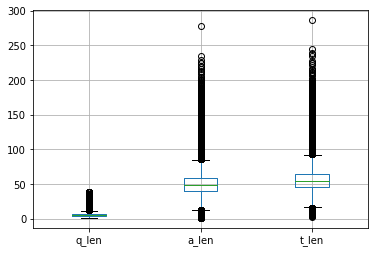

In [15]:
df.boxplot(column=['q_len', 'a_len', 't_len'])
plt.show()

In [22]:
in_f = '../data/answer-150.tsv'
df = pd.read_csv(in_f, sep='\t', header=None, index_col=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1136966,0.000000,1.318653,1.604635,-1.195688,-1.295471,1.689262,1.694147,1.139169,0.715886,1.209653
1,1136956,-1.045577,-0.519799,-0.019282,-0.666382,0.428019,1.462207,1.287689,-1.044903,0.889247,1.313553
2,1136841,0.169893,-2.492149,0.221325,-1.014440,0.270374,-1.562146,0.334735,0.400199,0.261115,-1.188819
3,1125025,-3.510911,0.397629,-1.284159,0.913110,-1.832554,-0.298626,-3.528545,-0.689734,0.270419,1.448757
4,86062,-0.394000,0.079198,0.868241,0.773861,0.080244,-1.868799,1.312911,-0.884691,0.494355,0.306874


In [23]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64